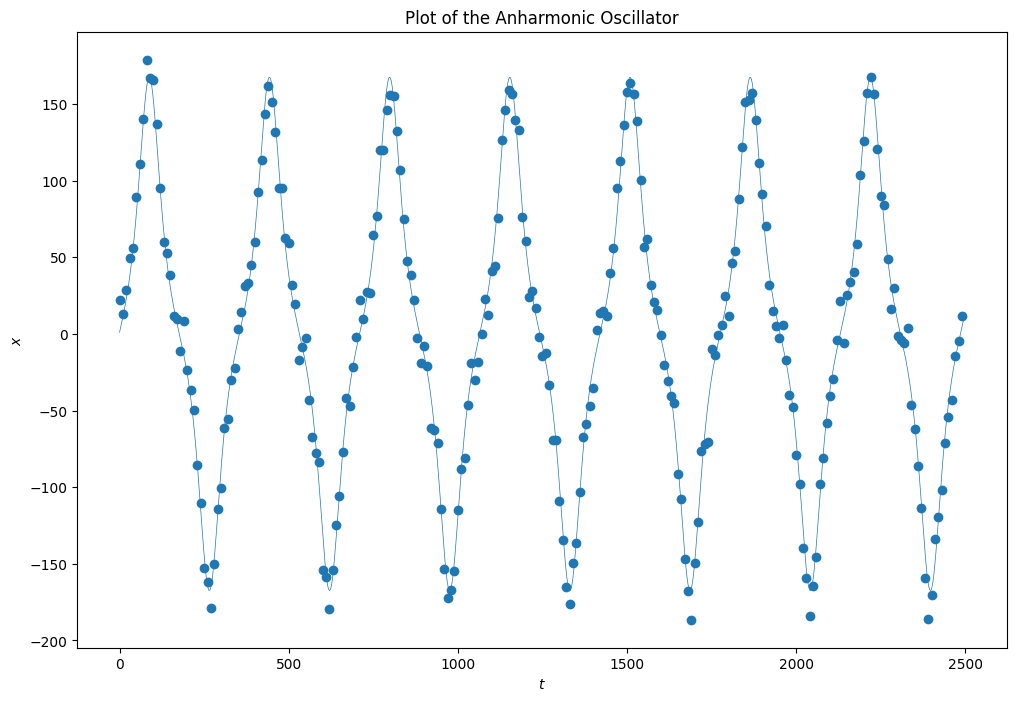

In [3]:
import matplotlib.pyplot as plt
import numpy as np

'''Discrete model approximating the anharmonic oscillator, this derivation comes from finite differencing of the continuous system'''
rng = np.random.default_rng()

sigma = 10 #standard deviation of the observation noise

x_0 = 0 
x_1 = 1

omega = 3.5 * 10**-2
lam = 3 * 10**-4

M = lambda u_k: np.array([
    [2 + omega**2 - lam**2 * u_k[0]**2, -1],
    [1,                               0]])

H = np.array([[1,0]])

N = 2500 #Number of time-points for which to simulate the system 

delta_t = 10

U = np.zeros((2,N)) #State is described by x_k and x_k-1
Y = np.zeros((1,N // delta_t)) #Observation is x_k 

R_o = sigma**2 * np.array([[1]]) #observation noise
t_dis = np.arange(0,N,delta_t)

U[0,0] = x_1
U[1,0] = x_0

y_index = 0
for k in range(0,N-1): 
   U[:,k+1] = M(U[:,k]) @ U[:,k]

   if(k % delta_t == 0): 
    Y[:,y_index] = H @ U[:,k]
    y_index += 1


Y = Y + rng.multivariate_normal([0],R_o,size = np.size(Y)).squeeze()

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot()
ax.plot(U[0, :],linewidth = 0.5)
ax.scatter(t_dis,Y.squeeze())
ax.set_ylabel("$x$")
ax.set_xlabel("$t$")
ax.set_title("Plot of the Anharmonic Oscillator")
plt.show()


In [7]:
n_ens = 5
proc_noise = 0. * np.eye(2)

x0 = np.array([1,0])  # Initial state (equilibrium)

X_ens = rng.multivariate_normal(x0, np.eye(2), n_ens).T

m_prior = np.mean(X_ens, axis=1)
R_prior = np.cov(X_ens)

K = R_prior@H.T@np.linalg.inv(H@R_prior@H.T + R_o)

eps = rng.multivariate_normal([0], R_o, n_ens)
for i_ens in range(0, n_ens):
    X_ens[:, i_ens] = X_ens[:, i_ens] + K@(Y[:, 0] - H@X_ens[:, i_ens] + eps[i_ens])


m_post = np.zeros((2, len(t_dis)))
m_post[:, 0] = np.mean(X_ens, axis=1)

# The ensemble Kalman filter is run for the rest of the time steps.
for i_time in range(0, len(t_dis)-1):

    print(f"Iteration: {i_time}")

    #simulation
    for i_ens in range(0, n_ens):
        for t in range(0,delta_t): 
            X_ens[:, i_ens] = M(X_ens[:, i_ens]) @ X_ens[:,i_ens]
        
    #forecast
    m_prior = np.mean(X_ens, axis=1)
    R_prior = np.cov(X_ens)  
    K = R_prior@H.T@np.linalg.inv(H@R_prior@H.T + R_o)

    eps = rng.multivariate_normal([0], R_o, n_ens)

    #correction
    for i_ens in range(0, n_ens):
        X_ens[:, i_ens] = X_ens[:, i_ens] + K@(Y[:, i_time+1] - H@X_ens[:, i_ens] + eps[i_ens])

    m_post[:, i_time+1] = np.mean(X_ens, axis=1)

Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 8
Iteration: 9
Iteration: 10
Iteration: 11
Iteration: 12
Iteration: 13
Iteration: 14
Iteration: 15
Iteration: 16
Iteration: 17
Iteration: 18
Iteration: 19
Iteration: 20
Iteration: 21
Iteration: 22
Iteration: 23
Iteration: 24
Iteration: 25
Iteration: 26
Iteration: 27
Iteration: 28
Iteration: 29
Iteration: 30
Iteration: 31
Iteration: 32
Iteration: 33
Iteration: 34
Iteration: 35
Iteration: 36
Iteration: 37
Iteration: 38
Iteration: 39
Iteration: 40
Iteration: 41
Iteration: 42
Iteration: 43
Iteration: 44
Iteration: 45
Iteration: 46
Iteration: 47
Iteration: 48
Iteration: 49
Iteration: 50
Iteration: 51
Iteration: 52
Iteration: 53
Iteration: 54
Iteration: 55
Iteration: 56
Iteration: 57
Iteration: 58
Iteration: 59
Iteration: 60
Iteration: 61
Iteration: 62
Iteration: 63
Iteration: 64
Iteration: 65
Iteration: 66
Iteration: 67
Iteration: 68
Iteration: 69
Iteration: 70
Iteration: 71
It

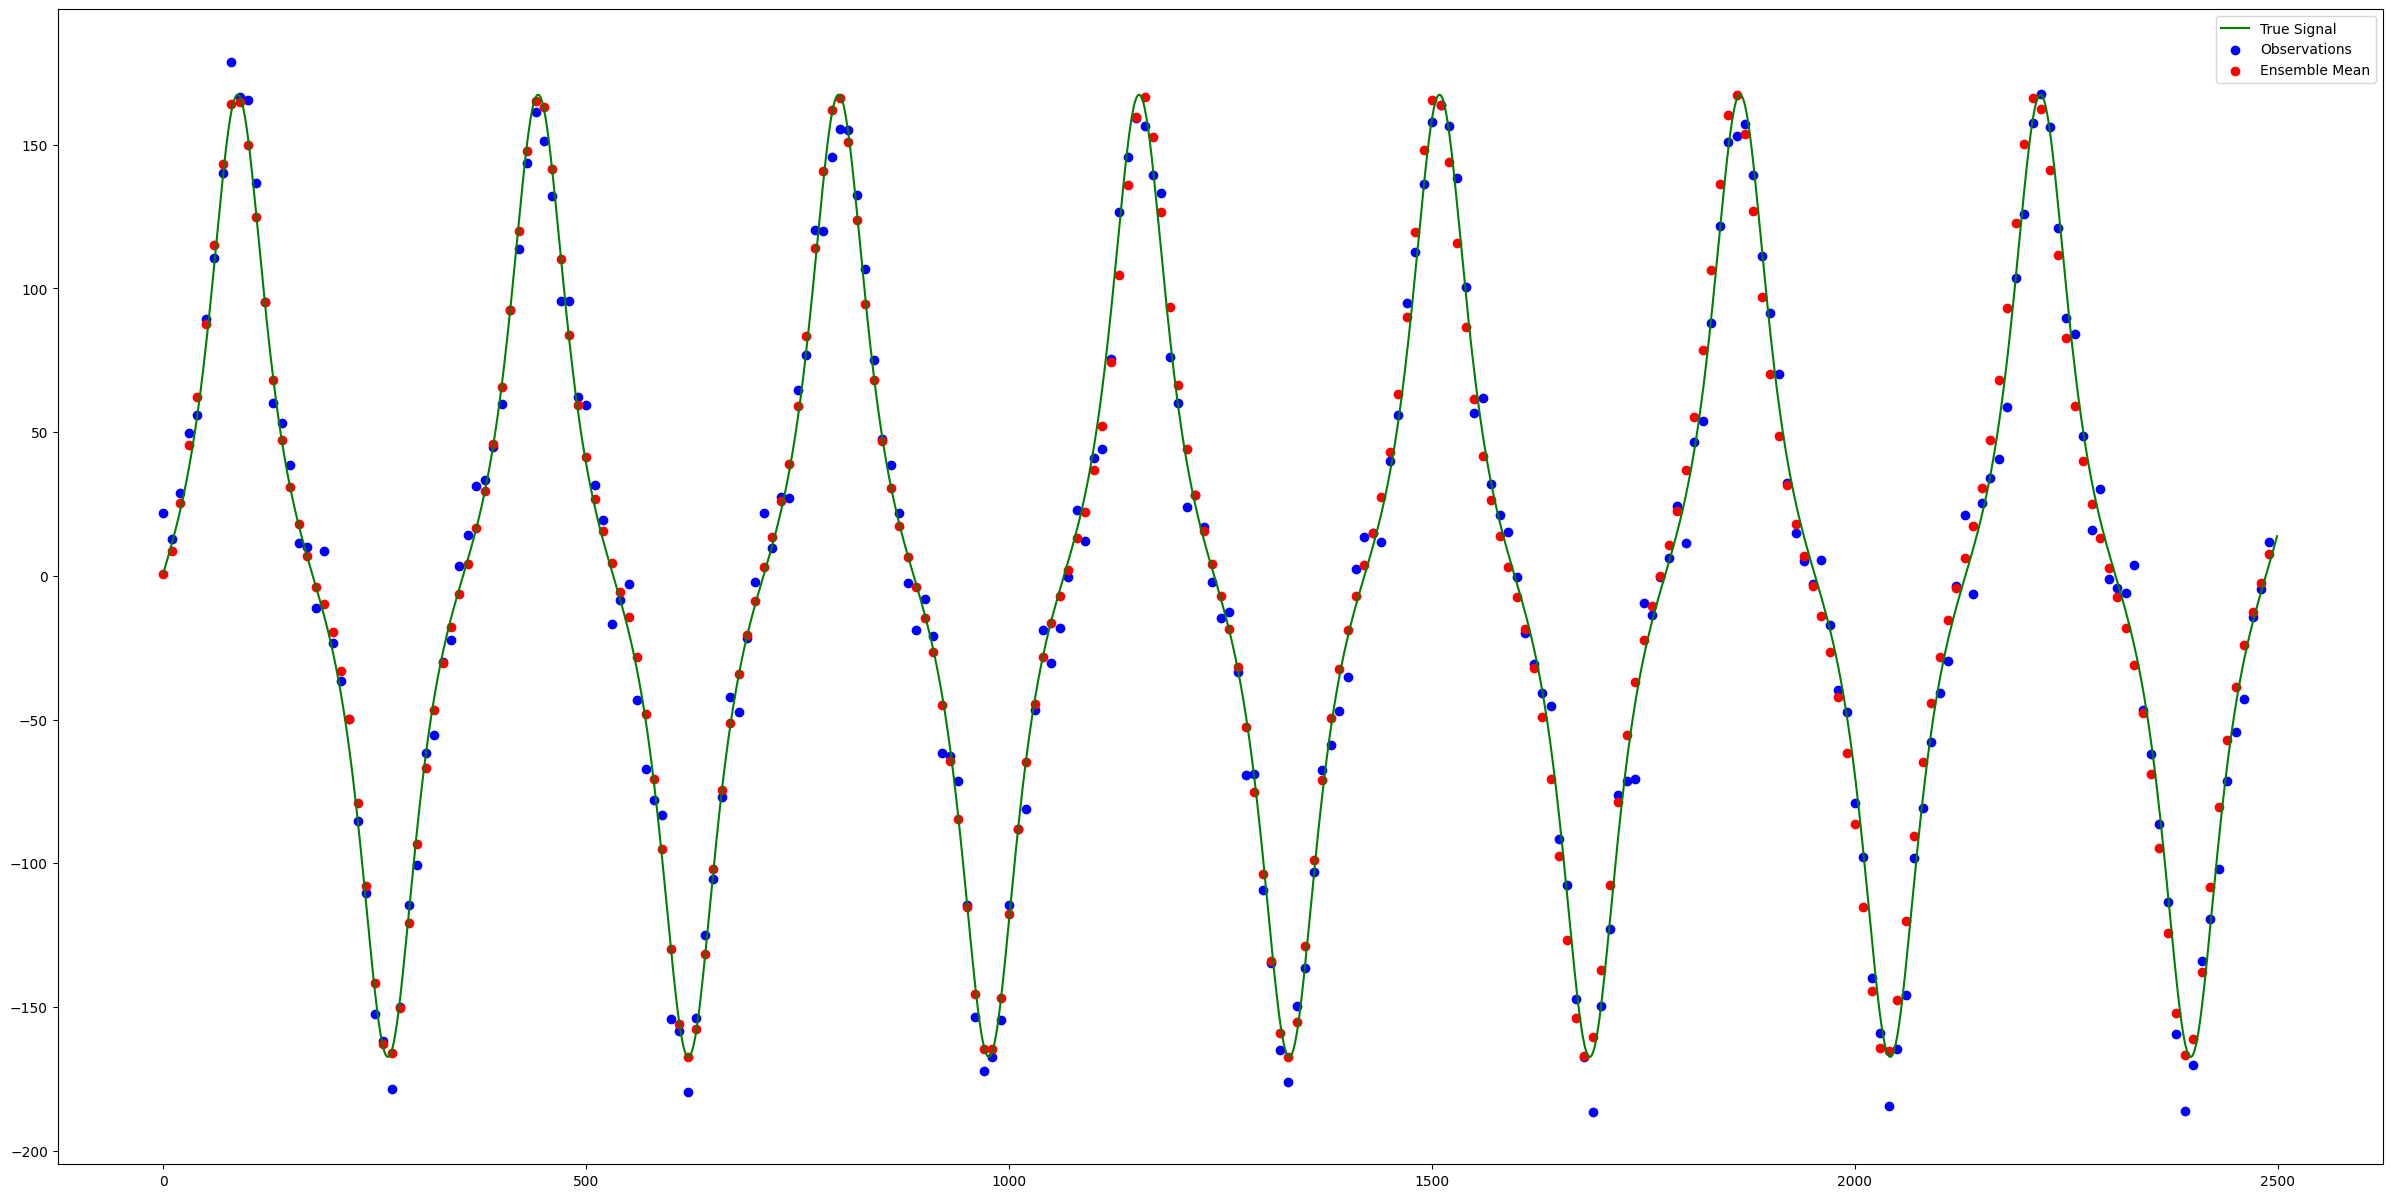

In [8]:
# Plot the first three variables
# The true signal is plotted in red
# The ensemble Kalman filter estimate is plotted in blue
fig = plt.figure(figsize=(30,15))

rows = 1
cols = 1

axes = fig.subplots(rows, cols)

axes.plot(U[0, :],color = 'green',label = 'True Signal')
axes.scatter(t_dis,Y.squeeze(),color = 'blue',label = 'Observations')
axes.scatter(t_dis,m_post[0,:],color = 'red',label = 'Ensemble Mean')
axes.legend()